# Evolutionary Salesman Algorithm Demonstration
This Jupyter Notebook will try to demonstrate the evolutionary algorithm developed to solve the salesman problem.

## Introduction

Firstly let's import some modules (including our own):

In [1]:
import lib.evo_salesman as evo
import lib.misc as msc

import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar

Now let's set our parameters with `set_parameters()`. These will be changed later on to compare different parameters when running the algorithm.

In [2]:
num_cities=100
num_generations=1000
num_individuals=100
mutation_prob=0.1
old_generation_ratio=0.8
map_size=100
rand_seed= 1337
evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               old_generation_ratio, map_size, rand_seed)

Now we can generate and plot the cities so we can get a better look at them.

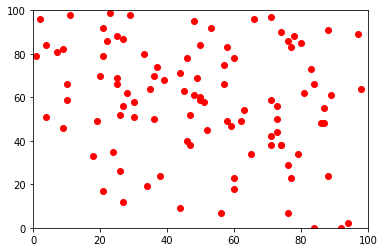

In [3]:
evo.create_cities()
cities = evo.get_cities()
msc.plot_cities(cities, map_size)

Finally, we can run the simulation and get the performance and history of every generation.

In [4]:
evo.run_simulation()
generations = evo.get_generations()

Let's see what was the shortest distance for each generation.

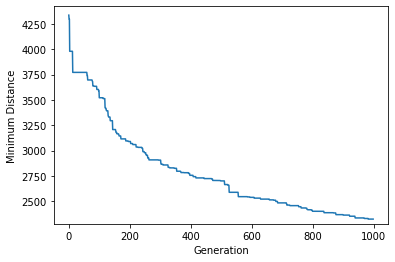

In [5]:
msc.plot_best_distance_per_generation(generations)

## Effects of Mutation
This section shows how changing the mutation chance can change the final result obtained. The mutation chance determines the chance of a new individual developing new random characteristics.

Now we'll run the algorithm for the same set of cities multiple times while changing the mutation chance. With that we can see how different chances of mutation can change the final results obtained.

100% (20 of 20) |########################| Elapsed Time: 0:00:58 Time:  0:00:58


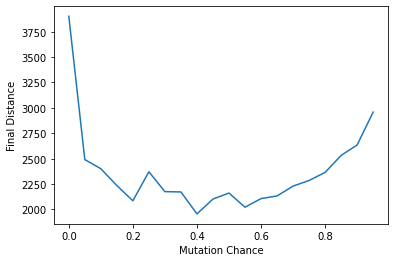

In [6]:
# Creating mutation chances equally spaced by 0.05 from 0 to 0.95
mutation_chances = np.linspace(0, 0.95, 20)

final_distances = []
for index in progressbar(range(len(mutation_chances))):
    mutation_chance = mutation_chances[index]
    evo.set_parameters(num_cities, num_generations, num_individuals, mutation_chance, 
               old_generation_ratio, map_size, rand_seed)
    evo.run_simulation()
    generations = evo.get_generations()
    final_distances.append(generations[-1].individuals[0].total_distance)

plt.xlabel('Mutation Chance')
plt.ylabel('Final Distance')
plt.plot(mutation_chances, final_distances)

We can see that the best result is obtained when the mutation chance is $40\%$.

With a low mutation chance, too few individuals with new characteristics would be generated in the system, lowering the chances for new strategies to be found. Additionally, a large mutation chance would make the system chaotic and wouldn't allow the characteristics of the best individuals to stay for the next generations. With that in mind it's easy to understand why the mutation chance that yielded the best results is neither too big nor too small, but close to $50\%$.

For the next experiments we will keep a mutation chance of $40\%$, since it yielded the best result in this section.

In [7]:
mutation_prob = 0.4
evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               old_generation_ratio, map_size, rand_seed)

## Effects of Replacement Ratio

This section will discuss the effects of differents replacement ratios. The replacement ratio determines how much of the previous generation's best individuals will remain for the next generation, while other individuals are replaced by new ones generated by breeding the remaining best individuals.

Like we did for the previous experiment, we will run the algorithm multiple times for different values of replacement ratios and plot the different results obtained.

Note that we are experimenting differents **replacement ratios**, which defines how much of the previous will be replaced, while `evo.set_parameters()` receives **old generation ratio**, which defines how much of the previous generation will remain. Both can be converted to one another easily with `old_generation_ratio = 1 - replacement_ratio`.

100% (19 of 19) |########################| Elapsed Time: 0:00:55 Time:  0:00:55


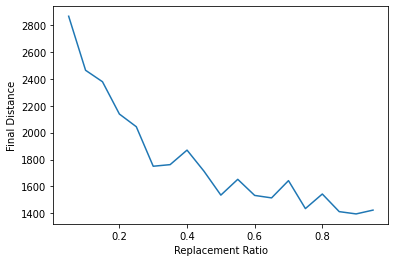

In [8]:
# Creating replacement ratios equally spaced by 0.05 from 0.05 to 0.95
replacement_ratios = np.linspace(0.05, 0.95, 19)

final_distances = []
for index in progressbar(range(len(replacement_ratios))):
    replacement_ratio = replacement_ratios[index]
    evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               1 - replacement_ratio, map_size, rand_seed)
    evo.run_simulation()
    generations = evo.get_generations()
    final_distances.append(generations[-1].individuals[0].total_distance)

plt.xlabel('Replacement Ratio')
plt.ylabel('Final Distance')
plt.plot(replacement_ratios, final_distances)

We can see that the best result was obtained with a value of $90\%$ for the replacement ratio. It makes sense for this value to be that big since we have a big population for each generation, so we can keep just a small percentage of the best individuals of a generation but still have a good amount.

For the next experiment we will use the value for the replacement ratio that provided the best result.

In [9]:
replacement_ratio = 0.9
old_generation_ratio = 1 - replacement_ratio
evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               old_generation_ratio, map_size, rand_seed)

# Final Result

We will use the best parameters obtained in the previous sections to run a simulation for several generations and see what is the best route between the cities we can get with them.

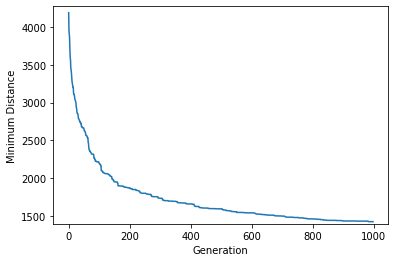

In [10]:
num_generations = 1000
evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               old_generation_ratio, map_size, rand_seed)
generations = evo.get_generations()
msc.plot_best_distance_per_generation(generations)

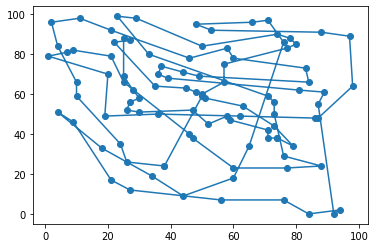

In [11]:
msc.plot_route(cities, generations[-1].individuals[0].route)

## Conclusion

We could see that the evolutionary algorithm was able to quickly converge and obtain a good route between the cities. To do that we needed to experiment a little to discover the parameters that would make this conversion as quick and as possible to a route with an acceptable total distance.

This is a heuristic method that doesn't necessarily have to obtain the best result avaiable, which means it is possible to set the parameters (generations and number of individuals) to get a good-enough result. This is useful if the problem is too big and would require a great amount of computer power to get the **best** possible solution, in this case it should be enough to get a good solution that isn't necessarily the best one.

It's good to note that the best parameters obtained ($40\%$ mutation chance and $90\%$ replacement ratio) can be different for different problems and are not universally the best parameters. This means that a little more experimenting could be needed depending on what problems the algorithm is being used.